# ***IMPORATION DES DONNEES ET CONNECTER GOOGLE COLAB ET KAGGLE***

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           5035        725  0.9375           
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            756        625  0.9375           
datasets/muratkokludataset/pistachio-dataset                                   Pistachio Dataset                                  2MB  2022-04-03 08:38:21            442        539  0.9375           


In [ ]:
! kaggle datasets download -d drgilermo/face-images-with-marked-landmark-points

 92% 97.0M/105M [00:00<00:00, 116MB/s]
100% 105M/105M [00:00<00:00, 115MB/s] 


In [ ]:
! unzip /content/face-images-with-marked-landmark-points.zip -d facial_data

Archive:  /content/face-images-with-marked-landmark-points.zip
  inflating: facial_data/face_images.npz  
  inflating: facial_data/facial_keypoints.csv  


# ***ANALYSE EXPLORATOIRE***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
face=np.load('/content/drive/MyDrive/kaggle/facial_data/face_images.npz')
face_features=face.get(face.files[0])  # take the image as array
face_features=np.moveaxis(face_features,-1,0)
face_features=face_features.reshape(face_features.shape[0],face_features.shape[1],face_features.shape[1],1)

In [ ]:
face_features.shape

(7049, 96, 96, 1)

In [ ]:
key_features=pd.read_csv('/content/drive/MyDrive/kaggle/facial_data/facial_keypoints.csv')
key_features.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [ ]:
key_features.shape

(7049, 30)

In [ ]:
key_features.isnull().sum()  # list of null values in each column

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
key_features.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
key_features.corr()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
left_eye_center_x,1.000000,0.029908,0.274459,-0.154728,0.856572,0.022211,0.879976,0.062128,0.308649,-0.104698,...,0.457468,0.192274,0.422891,0.284087,-0.008382,0.202842,0.260753,0.151302,0.374314,0.265655
left_eye_center_y,0.029908,1.000000,0.259012,0.346331,0.065749,0.926728,-0.013411,0.956066,0.101996,0.537101,...,-0.166891,0.333053,-0.340755,0.480924,-0.392434,0.219366,-0.425576,0.251472,-0.379980,0.130062
right_eye_center_x,0.274459,0.259012,1.000000,0.067621,0.294550,0.127367,-0.024408,0.060942,0.817895,0.090214,...,0.402189,0.024502,0.061124,-0.172144,0.424439,-0.215123,0.308889,-0.109026,0.319541,-0.251105
right_eye_center_y,-0.154728,0.346331,0.067621,1.000000,-0.149295,0.531960,-0.144389,0.221829,0.055758,0.923050,...,0.182866,0.329233,0.312434,0.098019,0.257956,0.397645,0.294145,0.198499,0.344010,0.044597
left_eye_inner_corner_x,0.856572,0.065749,0.294550,-0.149295,1.000000,-0.021444,0.653318,0.080430,0.267661,-0.172852,...,0.387317,-0.054712,0.287427,0.156495,0.145968,0.046439,0.322217,-0.083635,0.242669,0.303769
left_eye_inner_corner_y,0.022211,0.926728,0.127367,0.531960,-0.021444,1.000000,0.010531,0.869743,0.150281,0.710354,...,-0.091006,0.426897,-0.211855,0.493657,-0.335989,0.327081,-0.315929,0.387311,-0.367069,0.308555
left_eye_outer_corner_x,0.879976,-0.013411,-0.024408,-0.144389,0.653318,0.010531,1.000000,0.054156,0.316254,-0.094245,...,0.179189,0.165361,0.507755,0.325291,-0.136411,0.263466,0.229154,0.292129,0.176392,0.332880
left_eye_outer_corner_y,0.062128,0.956066,0.060942,0.221829,0.080430,0.869743,0.054156,1.000000,0.050529,0.373183,...,-0.176047,0.222928,-0.392594,0.506364,-0.462165,0.183239,-0.494482,0.216060,-0.561581,0.329316
right_eye_inner_corner_x,0.308649,0.101996,0.817895,0.055758,0.267661,0.150281,0.316254,0.050529,1.000000,0.124023,...,0.377931,0.118548,0.262597,-0.054888,0.262056,-0.094748,0.369890,0.109785,0.309453,-0.230177
right_eye_inner_corner_y,-0.104698,0.537101,0.090214,0.923050,-0.172852,0.710354,-0.094245,0.373183,0.124023,1.000000,...,0.053212,0.356647,0.237858,0.225398,0.108121,0.449346,0.176403,0.354693,0.203002,0.164086


In [ ]:
key_features.describe()
# # for left_eye_center_x ,mean=66,25% lies in 65 ,50% lies in 66.5 ,75% lies in 68 ,so i will the missing value with mean
# key_features['left_eye_center_x']=key_features['left_eye_center_x'].fillna(np.mean(key_features['left_eye_center_x']))
# # similar stats with left_eye_center_y
# key_features['left_eye_center_y']=key_features['left_eye_center_y'].fillna(np.mean(key_features['left_eye_center_y']))
# # same with right_eye_center_x and right_eye_center_y
# key_features['right_eye_center_y']=key_features['right_eye_center_y'].fillna(np.mean(key_features['right_eye_center_y']))
# key_features['right_eye_center_x']=key_features['right_eye_center_x'].fillna(np.mean(key_features['right_eye_center_x']))
# #left_eye_inner_corner_x is directly proportional to left_eye_inner_corner_y
# #fill all the remaining values with mean values
# key_features['left_eye_inner_corner_x']=key_features['left_eye_inner_corner_x'].fillna(np.mean(key_features['left_eye_inner_corner_x']))
# key_features['left_eye_inner_corner_y']=key_features['left_eye_inner_corner_y'].fillna(np.mean(key_features['left_eye_inner_corner_y']))
# key_features['left_eye_outer_corner_x']=key_features['left_eye_outer_corner_x'].fillna(np.mean(key_features['left_eye_outer_corner_x']))
# key_features['left_eye_outer_corner_y']=key_features['left_eye_outer_corner_y'].fillna(np.mean(key_features['left_eye_outer_corner_y']))

# key_features['right_eye_inner_corner_x']=key_features['right_eye_inner_corner_x'].fillna(np.mean(key_features['right_eye_inner_corner_x']))
# key_features['right_eye_inner_corner_y']=key_features['right_eye_inner_corner_y'].fillna(np.mean(key_features['right_eye_inner_corner_y']))
# key_features['right_eye_outer_corner_x']=key_features['right_eye_outer_corner_x'].fillna(np.mean(key_features['right_eye_outer_corner_x']))
# key_features['right_eye_outer_corner_y']=key_features['right_eye_outer_corner_y'].fillna(np.mean(key_features['right_eye_outer_corner_y']))


# key_features['left_eyebrow_inner_end_x']=key_features['left_eyebrow_inner_end_x'].fillna(np.mean(key_features['left_eyebrow_inner_end_x']))
# key_features['left_eyebrow_inner_end_y']=key_features['left_eyebrow_inner_end_y'].fillna(np.mean(key_features['left_eyebrow_inner_end_y']))
# key_features['left_eyebrow_outer_end_x']=key_features['left_eyebrow_outer_end_x'].fillna(np.mean(key_features['left_eyebrow_outer_end_x']))
# key_features['left_eyebrow_outer_end_y']=key_features['left_eyebrow_outer_end_y'].fillna(np.mean(key_features['left_eyebrow_outer_end_y']))

# key_features['right_eyebrow_inner_end_x']=key_features['right_eyebrow_inner_end_x'].fillna(np.mean(key_features['right_eyebrow_inner_end_x']))
# key_features['right_eyebrow_inner_end_y']=key_features['right_eyebrow_inner_end_y'].fillna(np.mean(key_features['right_eyebrow_inner_end_y']))
# key_features['right_eyebrow_outer_end_x']=key_features['right_eyebrow_outer_end_x'].fillna(np.mean(key_features['right_eyebrow_outer_end_x']))
# key_features['right_eyebrow_outer_end_y']=key_features['right_eyebrow_outer_end_y'].fillna(np.mean(key_features['right_eyebrow_outer_end_y']))

# key_features['mouth_left_corner_x']=key_features['mouth_left_corner_x'].fillna(np.mean(key_features['mouth_left_corner_x']))
# key_features['mouth_left_corner_y']=key_features['mouth_left_corner_y'].fillna(np.mean(key_features['mouth_left_corner_y']))
# key_features['mouth_right_corner_x']=key_features['mouth_right_corner_x'].fillna(np.mean(key_features['mouth_right_corner_x']))
# key_features['mouth_right_corner_y']=key_features['mouth_right_corner_y'].fillna(np.mean(key_features['mouth_right_corner_y']))

# key_features['mouth_center_top_lip_x']=key_features['mouth_center_top_lip_x'].fillna(np.mean(key_features['mouth_center_top_lip_x']))
# key_features['mouth_center_top_lip_y']=key_features['mouth_center_top_lip_y'].fillna(np.mean(key_features['mouth_center_top_lip_y']))
# key_features['mouth_center_bottom_lip_x']=key_features['mouth_center_top_lip_x'].fillna(np.mean(key_features['mouth_center_top_lip_x']))
# key_features['mouth_center_bottom_lip_y']=key_features['mouth_center_bottom_lip_y'].fillna(np.mean(key_features['mouth_center_bottom_lip_y']))

key_features=key_features.fillna(0)
key_features.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [ ]:
new_features = face_features[key_features.index.values, :, :, :]  #key_features.index.values is length of row
new_features=new_features/255
key_features.reset_index(inplace=True,drop=True)
new_features

array([[[[0.93333333],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333333],
         [0.9254902 ],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98431373]],

        [[0.92941176],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],

        ...,

        [[0.72941176],
         [0.71764706],
         [0.70980392],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.74117647],
         [0.7372549 ],
         [0.81176471],
         ...,
         [0.23921569],
         [0.27058824],
         [0.30588235]],

        [[0.74901961],
         [0.72156863],
         [0.72156863],
         ...,
         [0.2745098 ],
         [0.29411765],
         [0.35294118]]],


       [[[0.85882353],
         [0.84313725],
         [0.8 

In [ ]:
#plot the image
def imagePlot(arr,landmark_df,index):
    plt.imshow(arr[index,:,:,0],cmap='gray')
    plt.scatter(landmark_df.iloc[index][0:-1:2],landmark_df.iloc[index][1::2],c='y')
    plt.show()

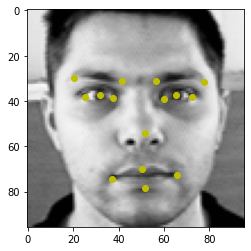

In [ ]:
# plt.imshow(new_features[3,:,:,0],cmap='gray')
imagePlot(new_features,key_features,3)

# ***Construction du Modèle***

In [ ]:
#train_x,test_x,train_y,test_y=train_test_split(new_features,key_features,test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_features,key_features,test_size=0.2)

In [ ]:
# Use Sequential Layer and Batch Normalisation layer
img_size=96
model=Sequential()

model.add(Input(shape=(img_size, img_size, 1)))

model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Now adding Flatten Layer and Dense layer in the Model

model.add(Flatten())
model.add(Dense(256,kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0))
model.add(Dense(30,kernel_initializer=glorot_uniform()))

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_69 (Bat  (None, 96, 96, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_69 (Conv2D)          (None, 96, 96, 32)        320       
                                                                 
 leaky_re_lu_115 (LeakyReLU)  (None, 96, 96, 32)       0         
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_92 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_70 (Bat  (None, 48, 48, 32)     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.compile(loss='mean_squared_error',optimizer=Adam(),metrics=['mean_squared_error'])

In [ ]:
model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/15
177/177 [==============================] - 9s 45ms/step - loss: 386.1707 - mean_squared_error: 386.1707 - val_loss: 526.4829 - val_mean_squared_error: 526.4829
Epoch 2/15
177/177 [==============================] - 8s 44ms/step - loss: 246.4844 - mean_squared_error: 246.4844 - val_loss: 514.0503 - val_mean_squared_error: 514.0503
Epoch 3/15
177/177 [==============================] - 8s 44ms/step - loss: 207.0570 - mean_squared_error: 207.0570 - val_loss: 325.3472 - val_mean_squared_error: 325.3472
Epoch 4/15
177/177 [==============================] - 8s 44ms/step - loss: 173.0496 - mean_squared_error: 173.0496 - val_loss: 181.0058 - val_mean_squared_error: 181.0058
Epoch 5/15
177/177 [==============================] - 8s 43ms/step - loss: 158.8083 - mean_squared_error: 158.8083 - val_loss: 191.9862 - val_mean_squared_error: 191.9862
Epoch 6/15
177/177 [==============================] - 8s 44ms/step - loss: 136.3153 - mean_squared_error: 136.3153 - val_loss: 140.3049 - val_mea

In [ ]:
history = model.fit(X_train, y_train,batch_size=100,epochs=350,validation_data=(X_test, y_test),shuffle=True,verbose=1)

Epoch 1/350
57/57 [==============================] - 6s 110ms/step - loss: 49.3395 - mean_squared_error: 49.3395 - val_loss: 99.3817 - val_mean_squared_error: 99.3817
Epoch 2/350
57/57 [==============================] - 6s 109ms/step - loss: 38.8959 - mean_squared_error: 38.8959 - val_loss: 102.0277 - val_mean_squared_error: 102.0277
Epoch 3/350
57/57 [==============================] - 6s 105ms/step - loss: 35.6096 - mean_squared_error: 35.6096 - val_loss: 104.9840 - val_mean_squared_error: 104.9840
Epoch 4/350
57/57 [==============================] - 6s 106ms/step - loss: 34.5142 - mean_squared_error: 34.5142 - val_loss: 105.4522 - val_mean_squared_error: 105.4522
Epoch 5/350
57/57 [==============================] - 6s 108ms/step - loss: 32.5853 - mean_squared_error: 32.5853 - val_loss: 100.1855 - val_mean_squared_error: 100.1855
Epoch 6/350
57/57 [==============================] - 6s 109ms/step - loss: 32.0175 - mean_squared_error: 32.0175 - val_loss: 107.8578 - val_mean_squared_erro

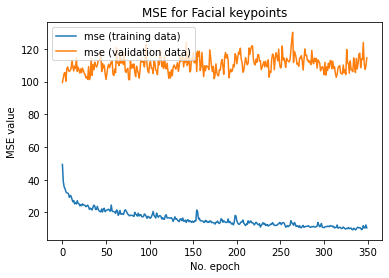

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mse (training data)')
plt.plot(history.history['val_mean_squared_error'], label='mse (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_pred=model.predict(X_test)

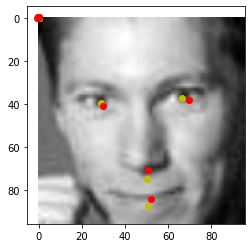

In [ ]:
def plot_image(img,truth,predicted,index):
    plt.imshow(img[index,:,:,0],cmap='gray')
    p=np.array(truth)[index]
    plt.scatter(p[0:-1:2],p[1::2],c='y')  # yellow color
    q=predicted[index,:]
    plt.scatter(q[0:-1:2],q[1::2],c='r')  # red color
    plt.show
plot_image(X_test,y_test,y_pred,11)

# ***cross validation***

In [ ]:
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(new_features,key_features,test_size=0.2)
def mmodel():
  img_size=96
  model=Sequential()
  model.add(Input(shape=(img_size, img_size, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Now adding Flatten Layer and Dense layer in the Model

  model.add(Flatten())
  model.add(Dense(256,kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))
  model.add(Dense(64,kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0))
  model.add(Dense(30,kernel_initializer=glorot_uniform()))
  model.compile(optimizer='adam', loss='mse', metrics='mse')
  return model
model=KerasClassifier(build_fn=mmodel,epochs=150, batch_size=32)
precision=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/150
159/159 [==============================] - 15s 16ms/step - loss: 394.9418 - mse: 394.9418
Epoch 2/150
159/159 [==============================] - 2s 15ms/step - loss: 240.7401 - mse: 240.7401
Epoch 3/150
159/159 [==============================] - 2s 14ms/step - loss: 208.8092 - mse: 208.8092
Epoch 4/150
159/159 [==============================] - 2s 14ms/step - loss: 177.3072 - mse: 177.3072
Epoch 5/150
159/159 [==============================] - 2s 14ms/step - loss: 158.8636 - mse: 158.8636
Epoch 6/150
159/159 [==============================] - 2s 15ms/step - loss: 141.9350 - mse: 141.9350
Epoch 7/150
159/159 [==============================] - 3s 21ms/step - loss: 121.1068 - mse: 121.1068
Epoch 8/150
159/159 [==============================] - 3s 19ms/step - loss: 107.4623 - mse: 107.4623
Epoch 9/150
159/159 [==============================] - 3s 16ms/step - loss: 96.5804 - mse: 96.5804
Epoch 10/150
159/159 [==============================] - 3s 17ms/step - loss: 84.1755 - mse: 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  Us

Epoch 1/150
159/159 [==============================] - 3s 15ms/step - loss: 421.1209 - mse: 421.1209
Epoch 2/150
159/159 [==============================] - 2s 15ms/step - loss: 252.9079 - mse: 252.9079
Epoch 3/150
159/159 [==============================] - 2s 15ms/step - loss: 207.3938 - mse: 207.3938
Epoch 4/150
159/159 [==============================] - 2s 15ms/step - loss: 179.4384 - mse: 179.4384
Epoch 5/150
159/159 [==============================] - 2s 15ms/step - loss: 160.9084 - mse: 160.9084
Epoch 6/150
159/159 [==============================] - 2s 15ms/step - loss: 143.6498 - mse: 143.6498
Epoch 7/150
159/159 [==============================] - 2s 15ms/step - loss: 132.2989 - mse: 132.2989
Epoch 8/150
159/159 [==============================] - 2s 15ms/step - loss: 120.2635 - mse: 120.2635
Epoch 9/150
159/159 [==============================] - 2s 15ms/step - loss: 110.4643 - mse: 110.4643
Epoch 10/150
159/159 [==============================] - 2s 15ms/step - loss: 97.8796 - mse:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  Us

Epoch 1/150
159/159 [==============================] - 4s 16ms/step - loss: 387.4462 - mse: 387.4462
Epoch 2/150
159/159 [==============================] - 3s 16ms/step - loss: 241.6368 - mse: 241.6368
Epoch 3/150
159/159 [==============================] - 3s 19ms/step - loss: 200.2187 - mse: 200.2187
Epoch 4/150
159/159 [==============================] - 2s 15ms/step - loss: 178.0221 - mse: 178.0221
Epoch 5/150
159/159 [==============================] - 3s 16ms/step - loss: 154.7891 - mse: 154.7891
Epoch 6/150
159/159 [==============================] - 2s 15ms/step - loss: 129.2282 - mse: 129.2282
Epoch 7/150
159/159 [==============================] - 2s 15ms/step - loss: 117.6413 - mse: 117.6413
Epoch 8/150
159/159 [==============================] - 2s 15ms/step - loss: 103.4730 - mse: 103.4730
Epoch 9/150
159/159 [==============================] - 2s 15ms/step - loss: 91.6477 - mse: 91.6477
Epoch 10/150
159/159 [==============================] - 2s 15ms/step - loss: 83.0877 - mse: 8

KeyboardInterrupt: ignored

In [ ]:
"""early_stop = EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(X_train, y_train,batch_size=100,epochs=350,validation_data=(X_test, y_test),shuffle=True,verbose=1)"""

precision
moyenne=precision.mean()
ecart_type=precision.std()
print("moyenne de precision",moyenne)
print("ecart_type de precision",ecart_type)

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mse (training data)')
plt.plot(history.history['val_mean_squared_error'], label='mse (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
def plot_image(img,truth,predicted,index):
    plt.imshow(img[index,:,:,0],cmap='gray')
    p=np.array(truth)[index]
    plt.scatter(p[0:-1:2],p[1::2],c='y')  # yellow color
    q=predicted[index,:]
    plt.scatter(q[0:-1:2],q[1::2],c='r')  # red color
    plt.show
plot_image(X_test,y_test,y_pred,11)

# ***GridSearchCV***

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
X_train, X_test, y_train, y_test = train_test_split(new_features,key_features,test_size=0.2)
from sklearn.model_selection import GridSearchCV
def mmodel(optimizer):
  img_size=96
  model=Sequential()
  model.add(Input(shape=(img_size, img_size, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding="same",kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Now adding Flatten Layer and Dense layer in the Model

  model.add(Flatten())
  model.add(Dense(256,kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))
  model.add(Dense(64,kernel_initializer=glorot_uniform()))
  model.add(LeakyReLU(alpha=0))
  model.add(Dense(30,kernel_initializer=glorot_uniform()))
  model.compile(optimizer=optimizer, loss='mse', metrics='mse')
  return model
model=KerasClassifier(build_fn=mmodel)
param={"epochs":[16,100], "batch_size":[32,40,60],"optimizer":["adam","rmsprop"]}
grid_search=GridSearchCV(estimator=model,param_grid=param,scoring='neg_mean_squared_error',cv=10)
early_stop = EarlyStopping(monitor='val_loss',patience=3)
grid_search=grid_search.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[early_stop])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),shuffle=True,verbose=1)

best_param=grid_search.best_params_
best_precision=grid_search.best_score_
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

print("best_param",best_param)
print("best_precision",best_precision)
print("best estimatot :",modelf)
print("modelf.score(X_test,y_test) :",modelf.score(X_test,y_test))
"""
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(X_train, y_train,batch_size=100,epochs=350,validation_data=(X_test, y_test),shuffle=True,verbose=1)"""